In [150]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
from scipy.stats import skew, kurtosis
import seaborn as sns
from matplotlib import pyplot as plt

import copy

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier

import math
import os

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Get a list of all files in the folder
files = os.listdir("refined_labels")

# Extract the first three letters of the file names and create a list
persons = []

for file in files:
    if(file[0] == 'P'):
        persons.append(file[:3])

In [107]:
persons

['P09',
 'P10',
 'P07',
 'P03',
 'P14',
 'P04',
 'P13',
 'P17',
 'P01',
 'P16',
 'P12',
 'P05',
 'P15',
 'P02',
 'P06',
 'P11',
 'P08']

In [108]:
# VO2 data got lost at some point for person = 2,6,12,16
# Therefore puttig these subjects into test set and rest for traininig
test = ['P07','P13','P14','P17']
train = [x for x in persons if x not in test]

In [109]:
test

['P07', 'P13', 'P14', 'P17']

In [110]:
train

['P09',
 'P10',
 'P03',
 'P04',
 'P01',
 'P16',
 'P12',
 'P05',
 'P15',
 'P02',
 'P06',
 'P11',
 'P08']

In [111]:
len(persons)

17

In [112]:
def getdf(person):
    return pd.read_csv(f"refined_labels/{person}-imu-right.csv")

def get_VO2df(person):
    return pd.read_csv(f'dataset/{person}/VO2/DataAverage.csv')

def get_demographics():
    return pd.read_csv('dataset/Demographics.csv')

In [113]:
def convert_to_unix_gmt(time):
    # Input datetime string
    datetime_string = time

    # Parse the datetime string into a datetime object
    datetime_object = datetime.strptime(datetime_string, "%Y-%m-%d %H:%M:%S")

    # Convert the datetime object to a Unix timestamp (13-digit, in milliseconds)
    unix_timestamp = int(datetime_object.replace(tzinfo=timezone.utc).timestamp() * 1000)

    return unix_timestamp

In [114]:
label1_df, label2_df, label3_df, label4_df, label5_df, label6_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [115]:
for person in train:
    df = getdf(person) # df1
    
    df['participant'] = person 
    
    VO2_df = get_VO2df(person) #df2
    
    # Drop rows where 'VO2' column has a value of 0
    VO2_df = VO2_df[VO2_df['VO2[mL/min]'] != 0]
    
    demographics = get_demographics()
    
    person_demo = demographics[demographics['Participant'] == person]
    print(person)
    for index, row in VO2_df.iterrows():
        # Convert the time to Unix timestamp
        unix_time = convert_to_unix_gmt(row['Time'])
        
        # Select rows from df1 within the time window
        selected_rows = df[(df['timestamp'] >= unix_time) & (df['timestamp'] <= unix_time + 1000)]
        
        if(len(selected_rows) > 0):
            # Calculate the result for selected rows
            EEAC = (1 / len(selected_rows)) * np.sqrt((selected_rows['ax']**2 + selected_rows['ay']**2 + selected_rows['az']**2)).sum()

            # Get the mode of the 'Label' column
            label_mode = selected_rows['Label'].mode().values[0]

            # Get the mode of the 'participant' column
            # Though it will be ensured that all participants will be same in selected_rows.
            # But just in case if in future code changes therefore applying for future reliability.
            participant_mode = selected_rows['participant'].mode().values[0]

            # Get the corresponding VO2 and FeO2 values from df2
            vo2 = row['VO2[mL/min]']
            feo2 = row['FeO2[%]']

            EE = ((vo2 - vo2*(feo2/100))/1000)*5

            if(label_mode == 1):
                # Append the results to energy_df
                label1_df = label1_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 2):
                # Append the results to energy_df
                label2_df = label2_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 3):
                # Append the results to energy_df
                label3_df = label3_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 4):
                # Append the results to energy_df
                label4_df = label4_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 5):
                # Append the results to energy_df
                label5_df = label5_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 6):
                # Append the results to energy_df
                label6_df = label6_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)


P09
P10
P03
P04
P01
P16
P12
P05
P15
P02
P06
P11
P08


In [176]:
label1_df

,Label,participant,Bias,EEAC,Age*EEAC,Height*EEAC,Weight*EEAC,EE[Kcal/min]
0,1,P09,1,16334.571596,441033.433083,1.241427e+06,2.891219e+06,0.938438
1,1,P09,1,16332.636069,440981.173860,1.241280e+06,2.890877e+06,0.938438
2,1,P09,1,16332.858864,440987.189325,1.241297e+06,2.890916e+06,0.938438
3,1,P09,1,16333.898543,441015.260658,1.241376e+06,2.891100e+06,0.938438
4,1,P09,1,16333.519249,441005.019728,1.241347e+06,2.891033e+06,0.938438
...,...,...,...,...,...,...,...,...
3194,1,P08,1,16429.684073,542179.574424,1.406381e+06,2.957343e+06,1.045910
3195,1,P08,1,16437.579029,542440.107968,1.407057e+06,2.958764e+06,1.045910
3196,1,P08,1,16428.862580,542152.465155,1.406311e+06,2.957195e+06,1.015308
3197,1,P08,1,16437.105248,542424.473168,1.407016e+06,2.958679e+06,1.015308


In [116]:
label1_df.nunique()

Label              1
participant       12
Bias               1
EEAC            3199
Age*EEAC        3199
Height*EEAC     3199
Weight*EEAC     3199
EE[Kcal/min]     865
dtype: int64

In [117]:
label1_df.isna().sum()

Label           0
participant     0
Bias            0
EEAC            0
Age*EEAC        0
Height*EEAC     0
Weight*EEAC     0
EE[Kcal/min]    1
dtype: int64

In [118]:
label1_df = label1_df.dropna()
label2_df = label2_df.dropna()
label3_df = label3_df.dropna()
label4_df = label4_df.dropna()
label5_df = label5_df.dropna()
label6_df = label6_df.dropna()

In [180]:
df = label1_df.loc[label1_df['participant'] == 'P04']
df
print((sum(df.iloc[:,-1][:60])/3600)*1000)

15.51749684722223


In [120]:
label4_df.describe()

,Label,Bias,EEAC,Age*EEAC,Height*EEAC,Weight*EEAC,EE[Kcal/min]
count,3937.0,3937.0,3937.000000,3937.000000,3.937000e+03,3.937000e+03,3937.000000
mean,4.0,1.0,16435.037510,504733.205050,1.216915e+06,2.854565e+06,4.329521
std,0.0,0.0,259.445178,88875.685995,1.988965e+05,1.238949e+05,2.247248
min,4.0,1.0,15374.856345,378802.590794,8.636980e+05,2.582976e+06,0.740119
25%,4.0,1.0,16270.616148,437866.406698,1.073232e+06,2.739000e+06,2.587305
50%,4.0,1.0,16393.897032,473486.427397,1.229555e+06,2.873369e+06,3.635626
75%,4.0,1.0,16537.972993,544757.901879,1.342759e+06,2.949187e+06,5.763232
max,4.0,1.0,17871.074277,713457.079097,1.668882e+06,3.184108e+06,10.593450


In [121]:
train_label_df_dict = {
    1 : label1_df,
    2 : label2_df,
    3 : label3_df,
    4 : label4_df,
    5 : label5_df,
    6 : label6_df
}

In [122]:
def extract_features(data, isfft):
    features = []
    for axis in ['ax', 'ay', 'az']:
        features.append(np.mean(data[axis]))
        features.append(np.std(data[axis]))
        features.append(np.mean(np.abs(data[axis] - np.mean(data[axis]))))
        features.append(np.min(data[axis]))
        features.append(np.max(data[axis]))
        features.append(np.max(data[axis]) - np.min(data[axis]))
        features.append(np.median(data[axis]))
        features.append(np.median(np.abs(data[axis] - np.median(data[axis]))))
        Q1 = np.percentile(data[axis], 25)
        Q3 = np.percentile(data[axis], 75)
        features.append(Q3 - Q1)
        
        if(isfft == False):
            features.append(np.sum(data[axis] < 0))
            features.append(np.sum(data[axis] > 0))
            
        features.append(np.sum(data[axis] > np.mean(data[axis])))
        diff = np.diff(np.sign(np.diff(data[axis])))
        peaks = np.where(diff == 2)[0] + 1
        features.append(len(peaks))
        features.append(skew(data[axis]))
        features.append(kurtosis(data[axis]))
        features.append(np.mean(data[axis]**2))
        
        argmin = data[axis].idxmin()
        argmax = data[axis].idxmax()
        diff_argmax_argmin = argmax - argmin
        
        features.append(argmax)
        features.append(argmin)
        features.append(diff_argmax_argmin)
        
    
     # Aggregate 'energy' and 'average resultant acceleration' for all three axes
    avg_resultant_acceleration = np.mean([np.sqrt(np.mean(data[axis]**2)) for axis in ['ax', 'ay', 'az']])
    signal_magnitude_area = np.mean([np.sum(np.abs(data[axis])) for axis in ['ax', 'ay', 'az']])
    
    features.append(avg_resultant_acceleration)
    features.append(signal_magnitude_area)

    return features

In [123]:
def windows(persons):
    Train = pd.DataFrame()
    Test = pd.DataFrame()
    stacked_df  = pd.DataFrame()
    for pn,person in enumerate(persons):
        df = pd.read_csv(f"refined_labels/{person}-imu-right.csv")
        df = df[['ax','ay','az','Label']]
        window_size = 500
        overlap = int(window_size * 0.5)
        windows = [df[i:i+window_size] for i in range(0, len(df) - window_size + 1, overlap)]
        
        feature_columns = []  # List to hold the feature column names

        # Initialize a DataFrame to store the features
        feature_df = pd.DataFrame()

        # Find the number of windows that can be created
        num_windows = len(df) // overlap - 1
        
        n_windows[person] = num_windows
        for i in range(num_windows):
            window = windows[i]

            if len(window) < window_size:
                continue  # Skip incomplete windows

            # Find the most common label in this window
            most_common_label = window['Label'].mode().values[0]

            # Extract features for each window
            window_features = extract_features(window, False)

            # Append the label with the highest frequency in this window
            window_features.append(most_common_label)

            feature_df = feature_df.append(pd.Series(window_features), ignore_index=True)

        # Rename the columns for the 50 features
        for axis in ['ax', 'ay', 'az']:
            for stat in ['mean', 'std', 'absdev', 'min', 'max', 'maxmin', 'median', 'medianabsdev', 'iqr', 'negcount', 'poscount', 'abovemean', 'peakcount', 'skew', 'kurtosis', 'energy','argmax','argmin','arg_diff']:
                feature_columns.append(f'{axis}_{stat}')
        
        feature_columns.append('avg_result_accl')
        feature_columns.append('sma')
        # Add label column name
        feature_columns.append('label')

        feature_df.columns = feature_columns
        
        stacked_df = pd.concat([stacked_df, feature_df], axis=0)
        
    return stacked_df

## Training model for activity identification

In [124]:
n_windows = {}

In [125]:
test_windows = windows(test)
train_windows = windows(train)

In [126]:
len(test_windows)

3452

In [127]:
X_train = train_windows.iloc[:,:-1].values
y_train = train_windows.iloc[:,-1].values

In [128]:
X_test = test_windows.iloc[:,:-1].values
y_test = test_windows.iloc[:,-1].values

In [129]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data = scaler.transform(X_train)
X_test_data = scaler.transform(X_test)

In [130]:
# Decision Tree Classifier model
dt = DecisionTreeClassifier()
dt.fit(X_train_data, y_train)
y_pred_dt = dt.predict(X_test_data)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8232908458864426

 -------------Classification Report-------------

              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       528
         2.0       0.83      0.98      0.90       597
         3.0       0.65      0.79      0.71       536
         4.0       0.89      0.61      0.72       608
         5.0       0.83      0.69      0.75       582
         6.0       0.82      0.94      0.88       601

    accuracy                           0.82      3452
   macro avg       0.83      0.82      0.82      3452
weighted avg       0.83      0.82      0.82      3452



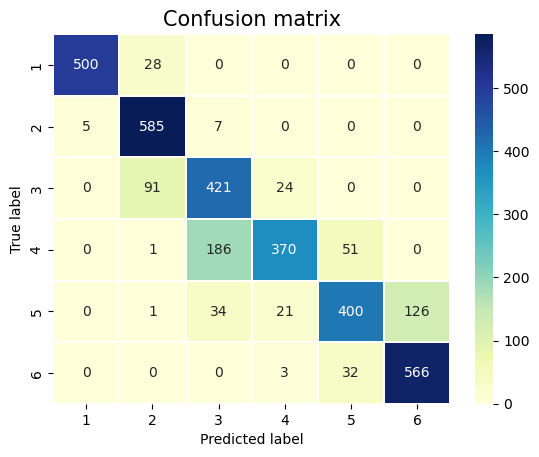

In [131]:
labels = [1,2,3,4,5,6]
confusion_matrix = cm(y_test, y_pred_dt)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt="d", cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [132]:
np.set_printoptions(threshold = 10)

In [133]:
y_pred_dt

array([1., 1., 1., ..., 6., 6., 6.])

### Appending predicted labels and making test data for energy expenditure prediction

In [134]:
test_labels = pd.DataFrame()

In [135]:
label1_df

,Label,participant,Bias,EEAC,Age*EEAC,Height*EEAC,Weight*EEAC,EE[Kcal/min]
0,1,P09,1,16334.571596,441033.433083,1.241427e+06,2.891219e+06,0.938438
1,1,P09,1,16332.636069,440981.173860,1.241280e+06,2.890877e+06,0.938438
2,1,P09,1,16332.858864,440987.189325,1.241297e+06,2.890916e+06,0.938438
3,1,P09,1,16333.898543,441015.260658,1.241376e+06,2.891100e+06,0.938438
4,1,P09,1,16333.519249,441005.019728,1.241347e+06,2.891033e+06,0.938438
...,...,...,...,...,...,...,...,...
3194,1,P08,1,16429.684073,542179.574424,1.406381e+06,2.957343e+06,1.045910
3195,1,P08,1,16437.579029,542440.107968,1.407057e+06,2.958764e+06,1.045910
3196,1,P08,1,16428.862580,542152.465155,1.406311e+06,2.957195e+06,1.015308
3197,1,P08,1,16437.105248,542424.473168,1.407016e+06,2.958679e+06,1.015308


In [136]:
predict_dfs = {}

In [137]:
current = 0

for person in test:
    df = getdf(person)[['timestamp','ax','ay','az']]
    window_size = 250
    
    num_repeats = len(df) // window_size - 1
    # print(num_repeats, n_windows[person])
    y_pred_p = y_pred_dt[current:current+n_windows[person]]
    current += n_windows[person]
    
    labels = []
    for i in range(num_repeats):
        for j in range(window_size):
            labels.append(y_pred_p[i])
            
    labels += [y_pred_p[-1]] * (len(df) - len(labels))
    df['Label'] = labels
    
    print(len(labels), len(df))
    
    predict_dfs[person] = df

220927 220927
213100 213100
219400 219400
211203 211203


In [138]:
test_label1_df, test_label2_df, test_label3_df, test_label4_df, test_label5_df, test_label6_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [139]:
for person in test:
    df = predict_dfs[person] # df1
    
    df['participant'] = person 
    
    VO2_df = get_VO2df(person) #df2
    
    # Drop rows where 'VO2' column has a value of 0
    VO2_df = VO2_df[VO2_df['VO2[mL/min]'] != 0]
    
    demographics = get_demographics()
    
    person_demo = demographics[demographics['Participant'] == person]
    print(person)
    for index, row in VO2_df.iterrows():
        # Convert the time to Unix timestamp
        unix_time = convert_to_unix_gmt(row['Time'])
        
        # Select rows from df1 within the time window
        selected_rows = df[(df['timestamp'] >= unix_time) & (df['timestamp'] <= unix_time + 1000)]
        
        if(len(selected_rows) > 0):
            # Calculate the result for selected rows
            EEAC = (1 / len(selected_rows)) * np.sqrt((selected_rows['ax']**2 + selected_rows['ay']**2 + selected_rows['az']**2)).sum()

            # Get the mode of the 'Label' column
            label_mode = selected_rows['Label'].mode().values[0]

            # Get the mode of the 'participant' column
            # Though it will be ensured that all participants will be same in selected_rows.
            # But just in case if in future code changes therefore applying for future reliability.
            participant_mode = selected_rows['participant'].mode().values[0]

            # Get the corresponding VO2 and FeO2 values from df2
            vo2 = row['VO2[mL/min]']
            feo2 = row['FeO2[%]']

            EE = ((vo2 - vo2*(feo2/100))/1000)*5

            if(label_mode == 1):
                # Append the results to energy_df
                test_label1_df = label1_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 2):
                # Append the results to energy_df
                test_label2_df = label2_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 3):
                # Append the results to energy_df
                test_label3_df = label3_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 4):
                # Append the results to energy_df
                test_label4_df = label4_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 5):
                # Append the results to energy_df
                test_label5_df = label5_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)
            if(label_mode == 6):
                # Append the results to energy_df
                test_label6_df = label6_df.append({"Label": label_mode, "participant": participant_mode, "Bias" : 1, "EEAC": EEAC, "Age*EEAC": person_demo['Age'].values[0]*EEAC, "Height*EEAC": person_demo['Weight'].values[0]*EEAC, "Weight*EEAC": person_demo['Height'].values[0]*EEAC, "EE[Kcal/min]" : EE}, ignore_index=True)

P07
P13
P14
P17


In [140]:
label6_df.isna().sum()

Label           0
participant     0
Bias            0
EEAC            0
Age*EEAC        0
Height*EEAC     0
Weight*EEAC     0
EE[Kcal/min]    0
dtype: int64

In [141]:
test_label1_df = test_label1_df.dropna()
test_label2_df = test_label2_df.dropna()
test_label3_df = test_label3_df.dropna()
test_label4_df = test_label4_df.dropna()
test_label5_df = test_label5_df.dropna()
test_label6_df = test_label6_df.dropna()

In [142]:
test_label_df_dict = {
    1 : test_label1_df,
    2 : test_label2_df,
    3 : test_label3_df,
    4 : test_label4_df,
    5 : test_label5_df,
    6 : test_label6_df
}

### Training Regression Models for each Activity

In [143]:
def fit(model, X, y):
    return model.fit(X,y)

def get_Xy_train(label):
    features = ['Bias', 'EEAC', 'Age*EEAC', 'Height*EEAC', 'Weight*EEAC']
    df = train_label_df_dict[label]
    X = df[features]
    y = df[['EE[Kcal/min]']]
    
    return X, y

def get_Xy_test(label):
    features = ['Bias', 'EEAC', 'Age*EEAC', 'Height*EEAC', 'Weight*EEAC']
    df = test_label_df_dict[label]
    X = df[features]
    y = df[['EE[Kcal/min]']]
    
    return X, y

In [152]:
models = {
    'lr' : LinearRegression(),
    'ridge' : Ridge(),
    'lasso' : Lasso(),
    'svr' : SVR(),
    'dtr' : DecisionTreeRegressor(),
    'rfr' : RandomForestRegressor(),
    'gbr' : GradientBoostingRegressor()
}

In [161]:
def regress(model):
    m1 = copy.deepcopy(models[model])
    m2 = copy.deepcopy(models[model])
    m3 = copy.deepcopy(models[model])
    m4 = copy.deepcopy(models[model])
    m5 = copy.deepcopy(models[model])
    m6 = copy.deepcopy(models[model])

    reg_l1 = fit(m1, get_Xy_train(1)[0], get_Xy_train(1)[1])
    reg_l2 = fit(m2, get_Xy_train(2)[0], get_Xy_train(2)[1])
    reg_l3 = fit(m3, get_Xy_train(3)[0], get_Xy_train(3)[1])
    reg_l4 = fit(m4, get_Xy_train(4)[0], get_Xy_train(4)[1])
    reg_l5 = fit(m5, get_Xy_train(5)[0], get_Xy_train(5)[1])
    reg_l6 = fit(m6, get_Xy_train(6)[0], get_Xy_train(6)[1])

    print("Mean square error for Label 1: ",mean_squared_error(get_Xy_test(1)[1], reg_l1.predict(get_Xy_test(1)[0])))
    print("Mean square error for Label 2: ",mean_squared_error(get_Xy_test(2)[1], reg_l2.predict(get_Xy_test(2)[0])))
    print("Mean square error for Label 3: ",mean_squared_error(get_Xy_test(3)[1], reg_l3.predict(get_Xy_test(3)[0])))
    print("Mean square error for Label 4: ",mean_squared_error(get_Xy_test(4)[1], reg_l4.predict(get_Xy_test(4)[0])))
    print("Mean square error for Label 5: ",mean_squared_error(get_Xy_test(5)[1], reg_l5.predict(get_Xy_test(5)[0])))
    print("Mean square error for Label 6: ",mean_squared_error(get_Xy_test(6)[1], reg_l6.predict(get_Xy_test(6)[0])))

In [162]:
regress('lr')

Mean square error for Label 1:  0.04903958185084915
Mean square error for Label 2:  0.35212516994716037
Mean square error for Label 3:  0.9548890674680578
Mean square error for Label 4:  3.1313097945430743
Mean square error for Label 5:  2.089225698413919
Mean square error for Label 6:  4.790159124631083


In [163]:
regress('ridge')

Mean square error for Label 1:  0.049039581850878894
Mean square error for Label 2:  0.3521251700271867
Mean square error for Label 3:  0.9548890672878966
Mean square error for Label 4:  3.1313097945348667
Mean square error for Label 5:  2.0892256984124358
Mean square error for Label 6:  4.79015912463143


In [164]:
regress('lasso')

Mean square error for Label 1:  0.049161394508171585
Mean square error for Label 2:  0.35310155744865107
Mean square error for Label 3:  0.9546245572312885
Mean square error for Label 4:  3.131302988270363
Mean square error for Label 5:  2.0892235166238207
Mean square error for Label 6:  4.790171228247637


In [165]:
regress('svr')

Mean square error for Label 1:  0.04023622981108958
Mean square error for Label 2:  0.39305219470681896
Mean square error for Label 3:  0.9994933630973131
Mean square error for Label 4:  3.1510326640434894
Mean square error for Label 5:  2.0194157223841445
Mean square error for Label 6:  4.93573519466593


In [166]:
regress('dtr')

Mean square error for Label 1:  0.00017104761036760793
Mean square error for Label 2:  0.010195402682417533
Mean square error for Label 3:  0.019699852592281346
Mean square error for Label 4:  0.007450549954543608
Mean square error for Label 5:  0.005820594118490132
Mean square error for Label 6:  0.014134320067274237


In [167]:
regress('rfr')

Mean square error for Label 1:  0.005679668103407955
Mean square error for Label 2:  0.050128313462890546
Mean square error for Label 3:  0.12047611597288928
Mean square error for Label 4:  0.21487319075284228
Mean square error for Label 5:  0.22662713301585455
Mean square error for Label 6:  0.3278005956224391


In [168]:
regress('gbr')

Mean square error for Label 1:  0.02522926074268565
Mean square error for Label 2:  0.1966767086887461
Mean square error for Label 3:  0.4757710430996562
Mean square error for Label 4:  0.9811074904117274
Mean square error for Label 5:  0.9921952390411769
Mean square error for Label 6:  1.5816929700647162


In [186]:
label6_df.describe()

,Label,Bias,EEAC,Age*EEAC,Height*EEAC,Weight*EEAC,EE[Kcal/min]
count,1735.0,1735.0,1735.000000,1735.000000,1.735000e+03,1.735000e+03,1735.000000
mean,6.0,1.0,16860.243936,525651.956862,1.289434e+06,2.898092e+06,5.859233
std,0.0,0.0,1067.772437,91544.374496,2.111349e+05,2.165772e+05,2.433531
min,6.0,1.0,14334.651055,384445.677253,8.702419e+05,2.408221e+06,0.892944
25%,6.0,1.0,16126.782800,459327.595549,1.138352e+06,2.725214e+06,4.189783
50%,6.0,1.0,16633.946416,492795.942468,1.227856e+06,2.877477e+06,6.377760
75%,6.0,1.0,17560.045569,592381.474462,1.425919e+06,3.044634e+06,7.511604
max,6.0,1.0,20409.509430,836789.886615,1.806939e+06,3.612483e+06,14.490751
